In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [2]:
#open up dataset and define it 
df = pd.read_csv('MI.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,1,77,1,2,1,1,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,?,2,0,...,0,0,0,0,0,0,0,0,0,0
3,4,68,0,0,0,0,2,?,2,0,...,0,0,0,0,0,0,1,0,0,0
4,5,60,1,0,0,0,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from numpy import nan
from pandas import read_csv

In [4]:
# summarize the shape of the raw data
print(df.shape)

(1700, 124)


In [5]:
# replace '?' values with 'nan'
df1 = df.replace("?", nan)
# summarize the shape of the data with missing rows removed
print(df1.shape)

(1700, 124)


In [6]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,1,77,1,2,1,1,2,NaN,3,0,...,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,NaN,2,0,...,0,0,0,0,0,0,0,0,0,0
3,4,68,0,0,0,0,2,NaN,2,0,...,0,0,0,0,0,0,1,0,0,0
4,5,60,1,0,0,0,2,NaN,3,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree

In [8]:
#drop the columns with missing variables of 15% or more 
df1 = df1.drop(columns=[88, 7, 34, 35, 96, 97, 95, 85, 84, 83, 82, 87, 86, 36, 37])
df1.head()

,0,1,2,3,4,5,6,8,9,10,...,114,115,116,117,118,119,120,121,122,123
0,1,77,1,2,1,1,2,3,0,7,...,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,2,0,2,...,0,0,0,0,0,0,0,0,0,0
3,4,68,0,0,0,0,2,2,0,3,...,0,0,0,0,0,0,1,0,0,0
4,5,60,1,0,0,0,2,3,0,7,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#define the independent variable
X = df1.iloc[:, 1:112].fillna(df1.median())
print(X)

     1    2   3   4   5   6   8   9   10  11  ... 114 115 116 117 118 119 120  \
0     77    1   2   1   1   2   3   0   7   0 ...   0   0   0   0   0   0   0   
1     55    1   1   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2     52    1   0   0   0   2   2   0   2   0 ...   0   0   0   0   0   0   0   
3     68    0   0   0   0   2   2   0   3   1 ...   0   0   0   0   0   0   1   
4     60    1   0   0   0   2   3   0   7   0 ...   0   0   0   0   0   0   0   
5     64    1   0   1   2   1   0   0   0   0 ...   0   0   0   0   0   0   0   
6     70    1   1   1   2   1   2   0   7   1 ...   0   0   0   0   0   0   1   
7     65    1   0   1   1   2   2   0   7   0 ...   0   0   0   0   0   0   0   
8     60    1   0   0   0   2   2   0   6   0 ...   0   0   0   0   0   0   0   
9     77    0   2   0   0   0   3   0   6   1 ...   0   0   0   0   0   0   1   
10    71    1   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
11    50    0   0   0   0   

In [10]:
# Atrial fibrillation SVM 
# assigning a dependent variable for output: Atrial fibrillation
y = df1.iloc[:, 97]
print(y)

0       0
1       0
2       0
3       0
4       0
5       1
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      1
       ..
1670    0
1671    0
1672    0
1673    0
1674    0
1675    0
1676    0
1677    0
1678    0
1679    0
1680    0
1681    0
1682    0
1683    0
1684    0
1685    0
1686    0
1687    0
1688    1
1689    0
1690    0
1691    0
1692    1
1693    0
1694    0
1695    0
1696    0
1697    0
1698    0
1699    0
Name: 112, Length: 1700, dtype: int64


In [11]:
#training the variables 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
# Generate a random binary classification problem.
svm_model = SVC()

# Fit a SVM moel.
svm_model.fit(X, y)

SVC()

In [13]:
from sklearn.metrics import accuracy_score

# make prediction
y_pred = svm_model.predict(X) 

print(y_pred)

[0 0 0 ... 0 0 0]


In [14]:
# compute accuracy and print it
accuracy = accuracy_score(y, y_pred) 
print("Accuracy : ", accuracy)

Accuracy :  0.9


[[376   0]
 [ 49   0]]


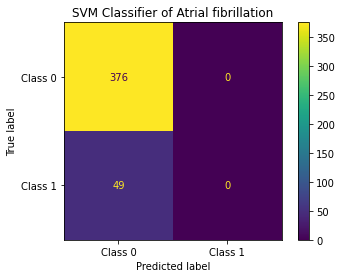

In [15]:
class_names = ["Class 0", "Class 1"]
# fit a SVM classifier using the training sub-set
classifier = SVC().fit(X_train, y_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels=class_names)
plt.title("SVM Classifier of Atrial fibrillation")

print(disp.confusion_matrix)

In [16]:
# Supraventricular tachycardia SVM
# assigning a dependent variable for output: Supraventricular tachycardia
y2 = df1.iloc[:, 98]

X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=0)



svm_model = SVC()

svm_model.fit(X, y2)

# make prediction
y2_pred = svm_model.predict(X) 

# compute accuracy and print it
accuracy = accuracy_score(y2, y2_pred) 
print("Accuracy : ", accuracy)




Accuracy :  0.9882352941176471


[[417   0]
 [  8   0]]


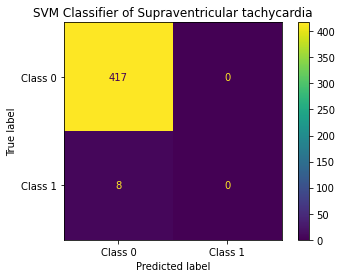

In [17]:
class_names = ["Class 0", "Class 1"]
# fit a SVM classifier using the training sub-set
classifier = SVC().fit(X_train, y2_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y2_test, display_labels=class_names)
plt.title("SVM Classifier of Supraventricular tachycardia")

print(disp.confusion_matrix)



In [18]:
# Ventricular tachycardia SVM
# assigning a dependent variable for output: Ventricular tachycardia
y3 = df1.iloc[:, 99]

#training the variables 
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, random_state=0)

# Generate a random binary classification problem.
svm_model = SVC()

# Fit a SVM moel.
svm_model.fit(X, y3)


# make prediction
y3_pred = svm_model.predict(X) 

# compute accuracy and print it
accuracy = accuracy_score(y3, y3_pred) 
print("Accuracy : ", accuracy)


Accuracy :  0.9752941176470589


[[415   0]
 [ 10   0]]


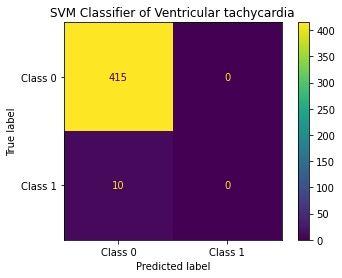

In [19]:
class_names = ["Class 0", "Class 1"]
# fit a SVM classifier using the training sub-set
classifier = SVC().fit(X_train, y3_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y3_test, display_labels=class_names)
plt.title("SVM Classifier of Ventricular tachycardia")

print(disp.confusion_matrix)


In [20]:
# Ventricular fibrillation SVM
# assigning a dependent variable for output: Ventricular fibrillation
y4 = df1.iloc[:, 100]

#training the variables 
X_train, X_test, y4_train, y4_test = train_test_split(X, y4, random_state=0)

# Generate a random binary classification problem.
svm_model = SVC()

# Fit a SVM moel.
svm_model.fit(X, y4)


# make prediction
y4_pred = svm_model.predict(X) 

# compute accuracy and print it
accuracy = accuracy_score(y4, y4_pred) 
print("Accuracy : ", accuracy)


Accuracy :  0.9582352941176471


[[406   0]
 [ 19   0]]


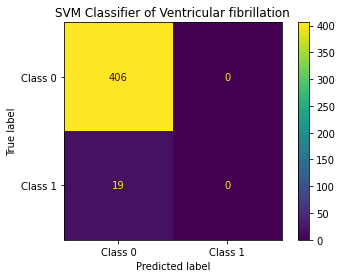

In [21]:
class_names = ["Class 0", "Class 1"]
# fit a SVM classifier using the training sub-set
classifier = SVC().fit(X_train, y4_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y4_test, display_labels=class_names)
plt.title("SVM Classifier of Ventricular fibrillation")

print(disp.confusion_matrix)



In [22]:
# Third-degree AV block SVM 
# assigning a dependent variable for output: Third-degree AV block
y5 = df1.iloc[:, 101]

#training the variables 
X_train, X_test, y5_train, y5_test = train_test_split(X, y5, random_state=0)

# Generate a random binary classification problem.
svm_model = SVC()

# Fit a SVM moel.
svm_model.fit(X, y5)


# make prediction
y5_pred = svm_model.predict(X) 

# compute accuracy and print it
accuracy = accuracy_score(y5, y5_pred) 
print("Accuracy : ", accuracy)


Accuracy :  0.9664705882352941


[[414   0]
 [ 11   0]]


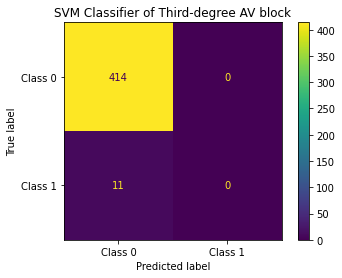

In [23]:
class_names = ["Class 0", "Class 1"]
# fit a SVM classifier using the training sub-set
classifier = SVC().fit(X_train, y5_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y5_test, display_labels=class_names)
plt.title("SVM Classifier of Third-degree AV block")

print(disp.confusion_matrix)


In [24]:
# Pulmonary edema SVM 
# assigning a dependent variable for output: Pulmonary edema
y6 = df1.iloc[:, 102]

#training the variables 
X_train, X_test, y6_train, y6_test = train_test_split(X, y6, random_state=0)

# Generate a random binary classification problem.
svm_model = SVC()

# Fit a SVM moel.
svm_model.fit(X, y6)


# make prediction
y6_pred = svm_model.predict(X) 

# compute accuracy and print it
accuracy = accuracy_score(y6, y6_pred) 
print("Accuracy : ", accuracy)


Accuracy :  0.9064705882352941


[[388   0]
 [ 37   0]]


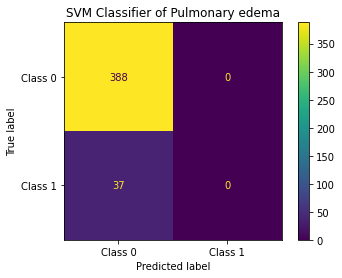

In [25]:
class_names = ["Class 0", "Class 1"]
# fit a SVM classifier using the training sub-set
classifier = SVC().fit(X_train, y6_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y6_test, display_labels=class_names)
plt.title("SVM Classifier of Pulmonary edema")

print(disp.confusion_matrix)

In [26]:
# Myocardial rupture SVM 
# assigning a dependent variable for output: Myocardial rupture
y7 = df1.iloc[:, 103]

#training the variables 
X_train, X_test, y7_train, y7_test = train_test_split(X, y7, random_state=0)

# Generate a random binary classification problem.
svm_model = SVC()

# Fit a SVM moel.
svm_model.fit(X, y7)


# make prediction
y7_pred = svm_model.predict(X) 

# compute accuracy and print it
accuracy = accuracy_score(y7, y7_pred) 
print("Accuracy : ", accuracy)


Accuracy :  0.9682352941176471


[[413   0]
 [ 12   0]]


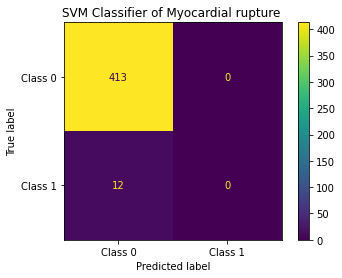

In [27]:
class_names = ["Class 0", "Class 1"]
# fit a SVM classifier using the training sub-set
classifier = SVC().fit(X_train, y7_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y7_test, display_labels=class_names)
plt.title("SVM Classifier of Myocardial rupture ")

print(disp.confusion_matrix)

In [28]:
# Dressler syndrome SVM 
# assigning a dependent variable for output: Dressler syndrome
y8 = df1.iloc[:, 104]

#training the variables 
X_train, X_test, y8_train, y8_test = train_test_split(X, y8, random_state=0)

# Generate a random binary classification problem.
svm_model = SVC()

# Fit a SVM moel.
svm_model.fit(X, y8)


# make prediction
y8_pred = svm_model.predict(X) 

# compute accuracy and print it
accuracy = accuracy_score(y8, y8_pred) 
print("Accuracy : ", accuracy)


Accuracy :  0.9558823529411765


[[404   0]
 [ 21   0]]


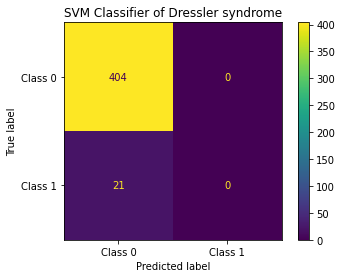

In [29]:
class_names = ["Class 0", "Class 1"]
# fit a SVM classifier using the training sub-set
classifier = SVC().fit(X_train, y8_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y8_test, display_labels=class_names)
plt.title("SVM Classifier of Dressler syndrome")

print(disp.confusion_matrix)

In [30]:
# Chronic heart failure SVM 
# assigning a dependent variable for output: Chronic heart failure
y9 = df1.iloc[:, 105]

#training the variables 
X_train, X_test, y9_train, y9_test = train_test_split(X, y9, random_state=0)

# Generate a random binary classification problem.
svm_model = SVC()

# Fit a SVM moel.
svm_model.fit(X, y9)


# make prediction
y9_pred = svm_model.predict(X) 

# compute accuracy and print it
accuracy = accuracy_score(y9, y9_pred) 
print("Accuracy : ", accuracy)


Accuracy :  0.768235294117647


[[325   0]
 [100   0]]


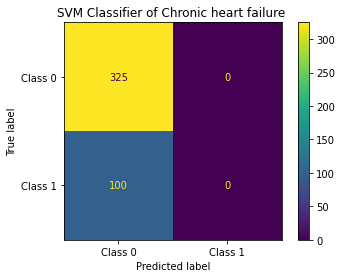

In [31]:
class_names = ["Class 0", "Class 1"]
# fit a SVM classifier using the training sub-set
classifier = SVC().fit(X_train, y9_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y9_test, display_labels=class_names)
plt.title("SVM Classifier of Chronic heart failure ")

print(disp.confusion_matrix)

In [32]:
# Relapse of the myocardial infarction SVM
# assigning a dependent variable for output: Relapse of the myocardial infarction
y10 = df1.iloc[:, 106]

#training the variables 
X_train, X_test, y10_train, y10_test = train_test_split(X, y10, random_state=0)

# Generate a random binary classification problem.
svm_model = SVC()

# Fit a SVM moel.
svm_model.fit(X, y10)


# make prediction
y10_pred = svm_model.predict(X) 

# compute accuracy and print it
accuracy = accuracy_score(y10, y10_pred) 
print("Accuracy : ", accuracy)


Accuracy :  0.9064705882352941


[[387   0]
 [ 38   0]]


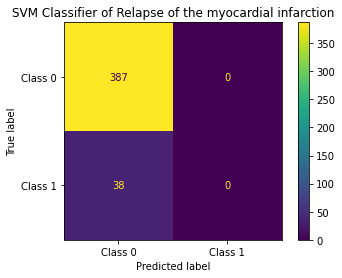

In [33]:
class_names = ["Class 0", "Class 1"]
# fit a SVM classifier using the training sub-set
classifier = SVC().fit(X_train, y10_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y10_test, display_labels=class_names)
plt.title("SVM Classifier of Relapse of the myocardial infarction")

print(disp.confusion_matrix)

In [34]:
# Post-infarction angina SVM
# assigning a dependent variable for output: Post-infarction angina
y11 = df1.iloc[:, 107]

#training the variables 
X_train, X_test, y11_train, y11_test = train_test_split(X, y11, random_state=0)

# Generate a random binary classification problem.
svm_model = SVC()

# Fit a SVM moel.
svm_model.fit(X, y11)


# make prediction
y11_pred = svm_model.predict(X) 

# compute accuracy and print it
accuracy = accuracy_score(y11, y11_pred) 
print("Accuracy : ", accuracy)


Accuracy :  0.9129411764705883


[[382   0]
 [ 43   0]]


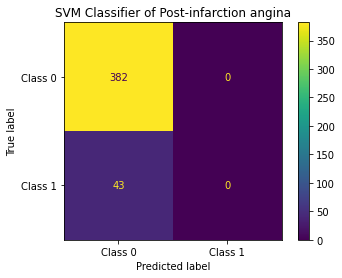

In [35]:
class_names = ["Class 0", "Class 1"]
# fit a SVM classifier using the training sub-set
classifier = SVC().fit(X_train, y11_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y11_test, display_labels=class_names)
plt.title("SVM Classifier of Post-infarction angina")

print(disp.confusion_matrix)



In [36]:
# Lethal outcome SVM 
# assigning a dependent variable for output: Atrial fibrillation
y12 = df1.iloc[:, 108]

#training the variables 
X_train, X_test, y12_train, y12_test = train_test_split(X, y12, random_state=0)

# Generate a random binary classification problem.
svm_model = SVC()

# Fit a SVM moel.
svm_model.fit(X, y12)


# make prediction
y12_pred = svm_model.predict(X) 

# compute accuracy and print it
accuracy = accuracy_score(y12, y12_pred) 
print("Accuracy : ", accuracy)


Accuracy :  0.8405882352941176


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (2).

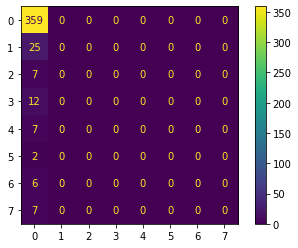

In [37]:
class_names = ["Class 0", "Class 1"]
# fit a SVM classifier using the training sub-set
classifier = SVC().fit(X_train, y12_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y12_test, display_labels=class_names)
plt.title("SVM Classifier of Atrial fibrillation")

print(disp.confusion_matrix)